In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# x = 3*np.random.rand(1000,1) Genera 1000 datos entre 0 y 1, pero multiplicado cada uno por tres. Visto en clases.
x = np.random.uniform(0,3,1000) #Lo mismo de arriba pero esta función más ad hoc.

A través de la misma librería genere los 1,000 datos de la variable dependiente, también conocida como target u output, de la siguiente forma y = 5 + 2x + U(2, 4)

In [5]:
# Profesor en clase expone y = 5 + 2*x + np.random.rand(1000,1)
y = 5 + 2*x + np.random.uniform(2,4,1000) # Esto genera los mismos números aleatorios uniformes entre 2 y 4 que se suman 
# a la ecuación previa.

El gráfico de dispersión.

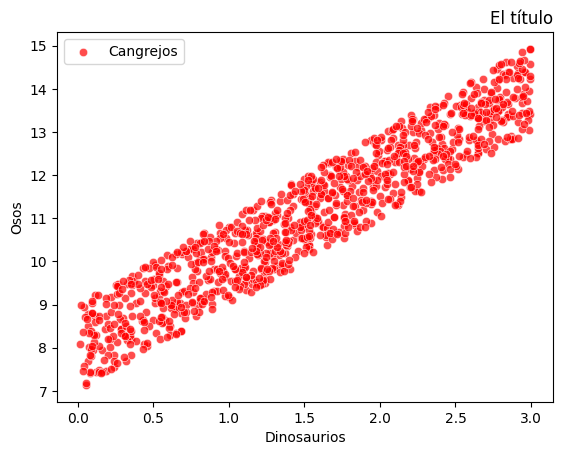

In [6]:
sns.scatterplot(x=x, y=y, alpha=0.7, label="Cangrejos", color="red")
plt.title("El título", loc="right")
plt.xlabel("Dinosaurios", fontsize="10")
plt.ylabel("Osos",fontsize="10")
plt.xticks(fontsize="10")
plt.yticks(fontsize="10")
plt.show()

Función para graficar datos en general

In [7]:
def visualizar(x, y, cant=1000):
    titulo = input("Ingrese el título del gráfico: \n")
    opacidad = int(input("Ingrese transparencia de los puntos (entre 0 y 100): \n"))/100
    variablex = input("Ingrese el nombre del eje x: \n")
    variabley = input("Ingrese el nombre del eje y: \n")
    tamañoValorEje = input("Ingrese el tamaño de los valores en los ejes (Recomendado de 8 a 12): \n")
    plt.figure(figsize=(8, 6))

    sns.scatterplot(x=x[:cant], y=y[:cant], alpha=opacidad, color="green", label="Datos orginales")
    plt.title(titulo, loc="right")
    plt.xlabel(variablex, fontsize="10")
    plt.ylabel(variabley,fontsize="10")
    plt.xticks(fontsize = tamañoValorEje)
    plt.yticks(fontsize = tamañoValorEje)
    
    # Damos la opción al usuario para guardar el gráfico, verlo o no hacer nada. Esto para poder utilizar esta función
    # dentro de la función solución gráfica más adelante.
    decisionUsuario = input(f"Presione 'G' para guardar el gráfico, 'V' para verlo y cualquier otro botón para continuar...").lower().strip()
    if decisionUsuario == "g":
        plt.savefig(f"gráfico.png")
        print(f"Archivo guardado.")
    elif decisionUsuario == "v":
        plt.show()
    else:
        return

Solución Cerrada

In [8]:
def parametrosOptimizados(factor,dep):
    
    extensionMatriz = np.vstack([np.ones(len(factor)),factor]).T # El vector de unos al lado del factor o variable ind.
    
    # La línea de abajo, debería representar la solución vista en clases: (X^T * X)^(−1) X^T * y 
    thetha = np.linalg.inv(extensionMatriz.T @ extensionMatriz) @ extensionMatriz.T @ dep
    
    print(f"Intercepción en eje y: {thetha[0]}, Pendiente: {thetha[1]}")
    return thetha[0], thetha[1]

Genere un gráfico que incluya la solución (recta  ́optima) y los datos utilizados. 
Cree una función que reciba x, y y los parámetros ́optimos y cree dicha visualización.
Para usar esta función tendríamos que hacer B0,B1 = parametrosOptimizados(x,y) primero.

In [9]:
def solucionGrafica(indep, depend, B0, B1): 

    visualizar(indep,depend)
    rangoIndependiente = np.linspace(indep.min(),indep.max())
    ecuacionRecta = B0 + B1 * rangoIndependiente
    plt.plot(rangoIndependiente, ecuacionRecta, color="blue", linewidth=2)
    plt.show()

Cree una clase cuyo nombre sea regressionLineal que contenga los métodos antes generados. La clase debe ser inicializada con los atributos: tipo de datos (simulado o real) y tamaño de la base de datos.

In [10]:
class regresionLineal:
    def __init__(self, tipoDatos, sizeBasedatos=None):
        self.tipoDatos = tipoDatos
        self.sizeBasedatos = sizeBasedatos
        self.x = None
        self.y = None

        if tipoDatos == "simulados":
            # Acá se le pide al usuario toda la información necesaria para realizar el mismo cálculo de datos simulados
            # que el profesor hizo más arriba.
            if self.sizeBasedatos == None:
                self.sizeBasedatos = int(input("Ingrese el tamaño, en número entero, de la base de datos a simular:\n"))
            else:
                rangoInf = int(input("Ingrese límite inferior del rango de datos a simular en X:\n"))
                rangoSup = int(input("Ingrese límite superior del rango de datos a simular en X:\n"))
                self.x = np.random.uniform(rangoInf,rangoSup,sizeBasedatos)
            
            simintercept = int(input(f"Ingrese el intercepto de la simulación:\n"))
            simpendiente = int(input(f"Ingrese pendiente de recta simulada:\n"))
            simruidoInf = int(input(f"Ingrese límite inferior del rango del ruido simulado:\n"))
            simruidoSup = int(input(f"Ingrese límite superior del rango del ruido simulado:\n"))
            self.y = simintercept + simpendiente * self.x + np.random.uniform(simruidoInf,simruidoSup,sizeBasedatos)

        elif tipoDatos == "reales":
            archivo = input("Ingrese el nombre del archivo csv con datos: \n")
            try:
                data = pd.read_csv(archivo)
                columnas = data.columns
                print(f"Columnas disponibles: {list(columnas)}")

                # Solicitar al usuario que elija las columnas de X y Y
                col_x = input(f"Ingrese el nombre de la columna a usar como variable independiente (x): ")
                col_y = input(f"Ingrese el nombre de la columna a usar como variable dependiente (y): ")

                # Revisar que las columnas existan en el archivo
                if col_x in columnas and col_y in columnas:
                    self.x = data[col_x].astype(float).values  # Convertir a float si es necesario
                    self.y = data[col_y].astype(float).values
                    self.sizeBasedatos = len(self.x)
                else:
                    print("Error: Una o ambas columnas seleccionadas no existen en el archivo.")
            except Exception as e:
                print(f"Error al cargar el archivo: {e}")
            pass
    
    def visualizar(self):
        titulo = input("Ingrese el título del gráfico: \n")
        opacidad = int(input("Ingrese transparencia de los puntos (entre 0 y 100): \n"))/100
        variablex = input("Ingrese el nombre del eje x: \n")
        variabley = input("Ingrese el nombre del eje y: \n")
        tamañoValorEje = input("Ingrese el tamaño de los valores en los ejes (Recomendado de 8 a 12): \n")
        plt.figure(figsize=(8, 6))

        sns.scatterplot(x=self.x[:self.sizeBasedatos], y=self.y[:self.sizeBasedatos], alpha=opacidad, color="green", label="Datos orginales")
        plt.title(titulo, loc="right")
        plt.xlabel(variablex, fontsize="10")
        plt.ylabel(variabley,fontsize="10")
        plt.xticks(fontsize = tamañoValorEje)
        plt.yticks(fontsize = tamañoValorEje)

        decisionUsuario = input(f"Presione 'G' para guardar el gráfico, 'V' para verlo y cualquier otro botón para continuar...").lower().strip()
        if decisionUsuario == "g":
            plt.savefig(f"gráfico.png")
            print(f"Archivo guardado.")
        elif decisionUsuario == "v":
            plt.show()
        else:
            return
    
    def parametrosOptimizados(self):
    
        extensionMatriz = np.vstack([np.ones(len(self.x)),self.x]).T
        thetha = np.linalg.inv(extensionMatriz.T @ extensionMatriz) @ extensionMatriz.T @ self.y
        print(f"Intercepción en eje y: {thetha[0]}, Pendiente: {thetha[1]}")
        return thetha[0], thetha[1]
    
    def solucionGrafica(self):

        self.visualizar()
        B0, B1 = self.parametrosOptimizados()
        rangoIndependiente = np.linspace(self.x.min(),self.x.max())
        ecuacionRecta = B0 + B1 * rangoIndependiente
        plt.plot(rangoIndependiente, ecuacionRecta, color="blue", linewidth=2, label="Línea de Regresión")
        plt.legend()
        plt.show()

Prueba de la clase con Datos Simulados.

Intercepción en eje y: 7.97652687242779, Pendiente: 2.026574920786577


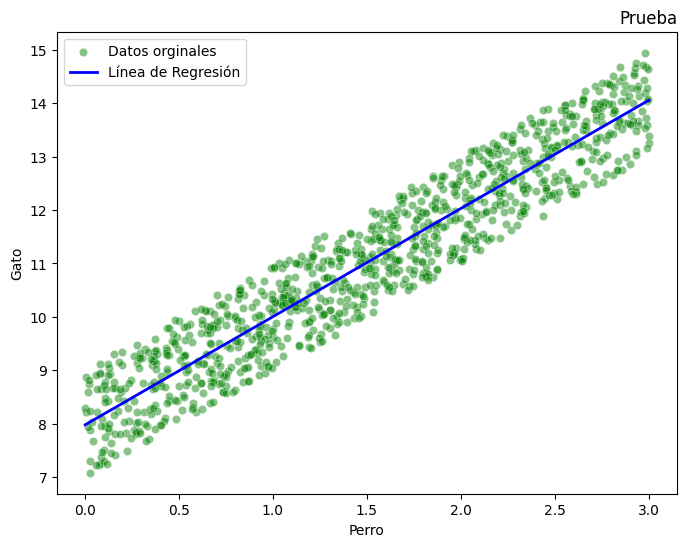

In [11]:
perro = regresionLineal("simulados",1000)
perro.solucionGrafica() # Funciona con datos simulados.

Prueba de la clase con datos reales (i.e., measurements.csv)

In [12]:
gato = regresionLineal("reales")
gato.solucionGrafica()

Columnas disponibles: ['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters', 'refill gas']
Error al cargar el archivo: could not convert string to float: '11,2'


TypeError: 'NoneType' object is not subscriptable

<Figure size 800x600 with 0 Axes>